In [315]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot

# WordCloud Packages
df = pd.read_csv('vgames.csv')
df.columns  = ["rank","name", "plat", "year", "genre", "publisher","America","EU","Japan", "Other" , "Global"] 

df = df.iloc[20:]

# Remove the last 5 rows
df = df.iloc[:-100]

df.drop(['Japan', 'Other'], axis=1, inplace=True)

# Display the DataFrame after dropping columns
df.replace(0, pd.NA, inplace=True)
df.dropna(inplace=True)
y = df['Global']
#ndf.drop(['Global'], axis=1, inplace=True)
df = df[["America","EU"]].copy()

In [316]:
column_types = df.dtypes
print(column_types)

America    object
EU         object
dtype: object


In [317]:
df['America'] = pd.to_numeric(df['America'], errors='coerce')
df['EU'] = pd.to_numeric(df['EU'], errors='coerce')

In [318]:
df.skew()

America    5.439970
EU         5.584474
dtype: float64

In [319]:
df = np.log1p(df)
df = df*2
df = np.log1p(df)
df.skew()

America    1.346910
EU         1.851135
dtype: float64

array([[<Axes: title={'center': 'America'}>,
        <Axes: title={'center': 'EU'}>]], dtype=object)

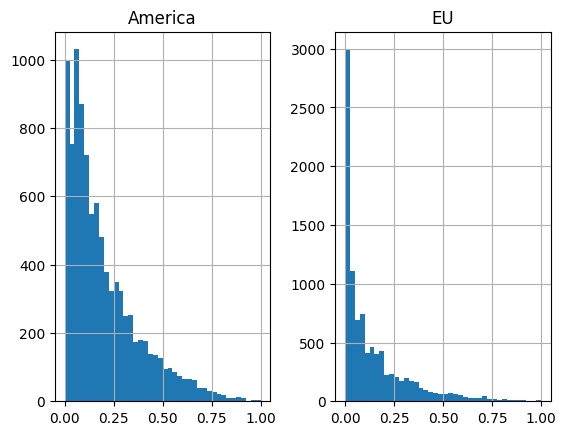

In [320]:
scaler = MinMaxScaler()

# Apply Min-Max scaling to the entire DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.hist(bins = 40)

In [321]:
df.dropna()

,America,EU
0,0.903068,0.921011
1,1.000000,0.796366
2,0.977504,0.855789
3,0.979191,0.957963
4,0.954505,0.965464
...,...,...
9547,0.000000,0.000000
9548,0.000000,0.000000
9549,0.000000,0.000000
9550,0.000000,0.000000


In [322]:
X = df

y = np.log1p(y.copy())

Standardized Mean Squared Error: 0.0076
R-squared: 0.9598


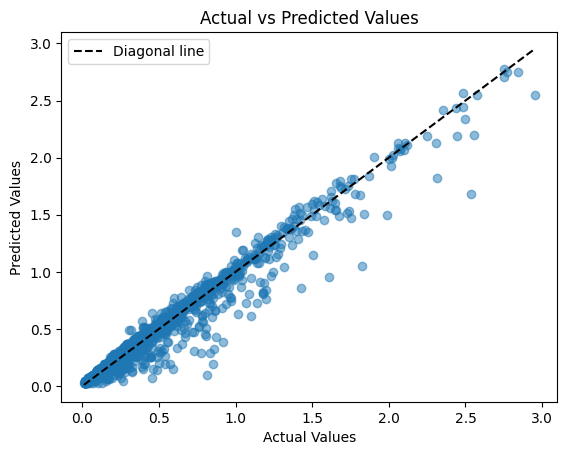

In [326]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor with 9 trees and a maximum depth of 7
rf_model = RandomForestRegressor(n_estimators=30, max_depth=8, random_state=1)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate standardized Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

# Print evaluation metrics
print(f'Standardized Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Plot actual vs predicted values with a diagonal line
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), '--k', label='Diagonal line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [297]:
df = pd.read_csv('vgames.csv')

catdf = df.select_dtypes('O')

ndf = df.select_dtypes(('int', 'float'))


In [298]:
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('vgames.csv')

catdf = df.select_dtypes('O')

# Assuming catdf is your DataFrame
# If not, replace catdf with the actual name of your DataFrame

# Download NLTK resources
#nltk.download('stopwords')
#nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace "//" with space
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove punctuation
    text = text.replace('[^\w\s]', '')
    
    # Remove numbers
    #text = text.replace('\d+', '')
    
    # Remove extra whitespaces
    text = text.replace('\s+', ' ')
    
    # Remove stop words
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    
    # Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Apply the preprocessing function to all text columns
catdf = catdf.applymap(lambda x: preprocess_text(x) if isinstance(x, str) else x)

# Display the DataFrame after text preprocessing
catdf


C:\Users\faraz\AppData\Local\Temp\ipykernel_13328\2221058544.py:47: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Name,Platform,Genre,Publisher
0,wii sport,wii,sport,nintendo
1,super mario bros,ne,platform,nintendo
2,mario kart wii,wii,racing,nintendo
3,wii sport resort,wii,sport,nintendo
4,pokemon red pokemon blue,gb,role playing,nintendo
...,...,...,...,...
16593,woody woodpecker crazy castle 5,gba,platform,kemco
16594,men black ii alien escape,gc,shooter,infogrames
16595,score international baja 1000 official game,ps2,racing,activision
16596,know 2,d,puzzle,7g ames


In [207]:
import pandas as pd

# Assuming catdf is your DataFrame
# If not, replace catdf with the actual name of your DataFrame

# Function to concatenate all columns with whitespaces
def concatenate_columns(row):
    return ' '.join(map(str, row))

# Apply the concatenation function to each row
catdf['concat'] = catdf.apply(concatenate_columns, axis=1)

# Display the DataFrame with the new concatenated column
print(catdf[['concat']])


                                                  concat
0                           wii sport wii sport nintendo
1                  super mario bros ne platform nintendo
2                     mario kart wii wii racing nintendo
3                    wii sport resort wii sport nintendo
4      pokemon red pokemon blue gb role playing nintendo
...                                                  ...
16593  woody woodpecker crazy castle 5 gba platform k...
16594    men black ii alien escape gc shooter infogrames
16595  score international baja 1000 official game ps...
16596                            know 2 d puzzle 7g ames
16597                  spirit spell gba platform wanadoo

[16598 rows x 1 columns]


In [18]:
df = pd.read_csv('vgames.csv')
df.columns  = ["rank","name", "plat", "year", "genre", "publisher","America","EU","Japan", "Other" , "Global"] 
#df.drop(['Japan', 'Other'], axis=1, inplace=True)

# Display the DataFrame after dropping columns
df.replace(0, pd.NA, inplace=True)
df.dropna(inplace=True)

# Calculate percentiles once
america_percentiles = np.percentile(df['America'], [2, 98])
eu_percentiles = np.percentile(df['EU'], [2, 98])

# Filter DataFrame
df_filtered = df[
    (america_percentiles[0] < df['America']) & (df['America'] < america_percentiles[1]) &
    (eu_percentiles[0] < df['EU']) & (df['EU'] < eu_percentiles[1])
]
df = df_filtered
df

,rank,name,plat,year,genre,publisher,America,EU,Japan,Other,Global
149,150,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.84
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50
173,174,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2.78,0.14,5.30
174,175,Final Fantasy X-2,PS2,2003.0,Role-Playing,Electronic Arts,1.92,1.08,2.11,0.17,5.29
180,181,Dragon Quest VIII: Journey of the Cursed King,PS2,2004.0,Role-Playing,Square Enix,0.65,0.75,3.61,0.20,5.21
...,...,...,...,...,...,...,...,...,...,...,...
16135,16138,Vanark,PS,1999.0,Shooter,Jaleco,0.01,0.01,0.00,0.00,0.01
16154,16157,Bratz: Forever Diamondz,PS2,2006.0,Adventure,THQ,0.01,0.01,0.00,0.00,0.01
16193,16196,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,0.01,0.01,0.00,0.00,0.01
16222,16225,Carmageddon: Max Damage,XOne,2016.0,Action,Stainless Games,0.01,0.01,0.00,0.00,0.01


,rank,year,America,EU,Japan,Other,Global
0,1,27.0,41.49,29.02,3.77,8.46,82.74
1,2,6.0,29.08,3.58,6.81,0.77,40.24
2,3,29.0,15.85,12.88,3.79,3.31,35.82
3,4,30.0,15.75,11.01,3.28,2.96,33.00
4,5,17.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,16596,23.0,0.01,0.00,0.00,0.00,0.01
16594,16597,24.0,0.01,0.00,0.00,0.00,0.01
16595,16598,29.0,0.00,0.00,0.00,0.00,0.01
16596,16599,31.0,0.00,0.01,0.00,0.00,0.01


In [101]:
ndf

,America,EU,Japan,Other,Global
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


In [61]:
import numpy as np

df = pd.read_csv('vgames.csv')

catdf = df.select_dtypes('O')

ndf = df.select_dtypes(('int', 'float'))


ndf.columns  = ["rank","year","America","EU","Japan", "Other" , "Global"] 
ndf

#ndf.replace(0, pd.NA, inplace=True)
#ndf.dropna(inplace=True)
# Assuming ndf is your DataFrame
# If not, replace ndf with the actual name of your DataFrame

ndf = ndf[["America","EU","Japan", "Other", "Global"]]


ndf = ndf.replace(0, pd.NA)
ndf = ndf.dropna()

ndf = ndf*1000

ndf = ndf.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with a suitable replacement

# Apply log10 transformation
ndf = np.log10(ndf)

ndf

,America,EU,Japan,Other,Global
0,4.617943,4.462697,3.576341,3.927370,4.917716
1,4.463594,3.553883,3.833147,2.886491,4.604658
2,4.200029,4.109916,3.578639,3.519828,4.554126
3,4.197281,4.041787,3.515874,3.471292,4.518514
4,4.051924,3.948902,4.009451,3.000000,4.496515
...,...,...,...,...,...
11896,1.000000,1.301030,1.602060,1.000000,1.845098
12012,1.000000,1.301030,1.301030,1.000000,1.845098
12488,1.000000,1.301030,1.477121,1.000000,1.778151
13000,1.477121,1.000000,1.000000,1.000000,1.698970


In [62]:
def remove_outliers(df, threshold=3):
    # Convert non-numeric values to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Calculate Z-scores
    z_scores = stats.zscore(df)
    abs_z_scores = abs(z_scores)
    
    # Filter outliers
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    
    return df[filtered_entries]

# Remove outliers for each column
dfno = remove_outliers(ndf)

dfno

,America,EU,Japan,Other,Global
6,4.056142,3.965202,3.812913,3.462398,4.477266
7,4.147058,3.963788,3.466868,3.454845,4.462697
8,4.164055,3.848805,3.672098,3.354108,4.456670
10,3.957607,4.041393,3.285557,3.439333,4.393751
11,3.991669,3.879096,3.615950,3.283301,4.369587
...,...,...,...,...,...
11896,1.000000,1.301030,1.602060,1.000000,1.845098
12012,1.000000,1.301030,1.301030,1.000000,1.845098
12488,1.000000,1.301030,1.477121,1.000000,1.778151
13000,1.477121,1.000000,1.000000,1.000000,1.698970


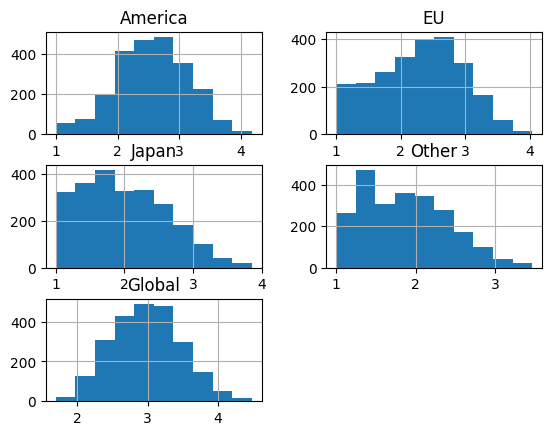

In [63]:
dfno.hist()
plt.show()

In [251]:
import numpy as np
ndf = ndf * 1000000

#zeros_mask = (ndf == 0)
#unique_random_values = np.random.randint(1, 101, size=ndf.shape)
#ndf = np.where(zeros_mask, unique_random_values, ndf)
ndf = np.log10(ndf)  # Apply log10 transformation

ndf1= ndf
ndf1

column_names = ['America', 'EU', 'Japan', 'Other', 'Global']
ndf1 = pd.DataFrame(ndf1, columns=column_names)
ndf1

,America,EU,Japan,Other,Global
0,7.617943,7.462697,6.576341,6.927370,7.917716
1,7.463594,6.553883,6.833147,5.886491,7.604658
2,7.200029,7.109916,6.578639,6.519828,7.554126
3,7.197281,7.041787,6.515874,6.471292,7.518514
4,7.051924,6.948902,7.009451,6.000000,7.496515
...,...,...,...,...,...
9473,4.778151,4.301030,4.602060,4.301030,5.113943
9492,4.602060,4.477121,4.602060,4.301030,5.113943
9784,4.477121,4.698970,4.301030,4.301030,5.079181
9867,4.477121,4.698970,4.301030,4.301030,5.079181


,America,EU,Japan,Other,Global
0,7.617943,7.462697,6.576341,6.927370,7.917716
1,7.463594,6.553883,6.833147,5.886491,7.604658
2,7.200029,7.109916,6.578639,6.519828,7.554126
3,7.197281,7.041787,6.515874,6.471292,7.518514
4,7.051924,6.948902,7.009451,6.000000,7.496515
...,...,...,...,...,...
16593,4.000000,1.755875,1.826075,0.301030,4.000000
16594,4.000000,1.681241,1.939519,1.954243,4.000000
16595,0.000000,1.397940,1.113943,1.255273,4.000000
16596,1.672098,4.000000,1.748188,1.591065,4.000000


In [252]:
# Assuming ndf1 is your DataFrame
#ndf2 = ndf1[ndf1 > 4]
# Display the filtered DataFrame
#print(ndf2)


In [235]:
ndf2 = ndf2.dropna()

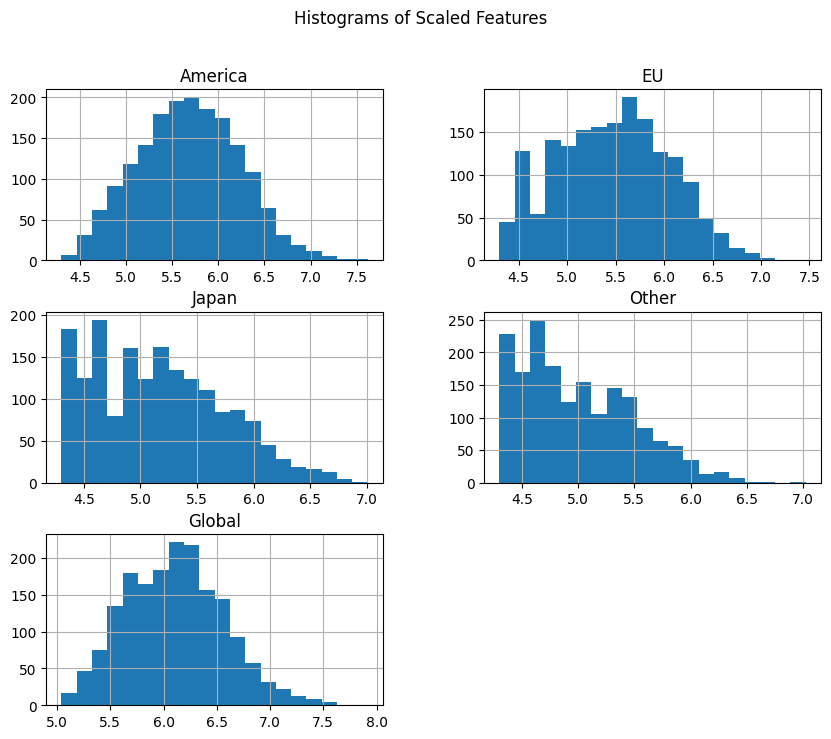

In [253]:
import matplotlib.pyplot as plt

# Assuming scaled_df is already created from the previous example

# Plot histograms for each column
ndf1.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Scaled Features')
plt.show()


## Equal Bins

In [205]:
ndf = df
for column in ndf.columns:
    try:
        ndf[f'{column}_bins'] = pd.qcut(ndf[column], q=[0, 1/3, 2/3, 1], labels=['low', 'med', 'high'], duplicates='drop')
    except ValueError:
        print(f"Skipping column {column} due to an issue with bin creation")
ndf = ndf.dropna()
print(ndf)



        America        EU     Japan     Other    Global America_bins EU_bins  \
0      7.617943  7.462697  6.576341  6.927370  7.917716         high    high   
1      7.463594  6.553883  6.833147  5.886491  7.604658         high    high   
2      7.200029  7.109916  6.578639  6.519828  7.554126         high    high   
3      7.197281  7.041787  6.515874  6.471292  7.518514         high    high   
4      7.051924  6.948902  7.009451  6.000000  7.496515         high    high   
...         ...       ...       ...       ...       ...          ...     ...   
16593  4.000000  1.518514  1.602060  1.991226  4.000000          low     low   
16594  4.000000  1.041393  1.556303  1.278754  4.000000          low     low   
16595  1.113943  1.447158  1.643453  1.954243  4.000000          low     low   
16596  1.875061  4.000000  1.462398  1.724276  4.000000          low     med   
16597  4.000000  1.851258  1.982271  1.707570  4.000000          low     low   

      Japan_bins Other_bins Global_bins

## Unequal bins

In [254]:
import pandas as pd
ndf1 = ndf2


# Convert all columns to numeric (handle non-numeric values)
ndf1 = ndf1.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (NaN)
ndf1 = ndf1.dropna()

# Specify the number of bins (adjust as needed)
num_bins = 3

# Create equally spaced bins for each column
for column in ndf1.columns:
    ndf1[f'{column}_bins'] = pd.cut(ndf1[column], bins=num_bins, labels=[f'{column}_low', f'{column}_med', f'{column}_high'], include_lowest=True)

# Display the DataFrame with the new categorical columns
print(ndf1)


        America        EU     Japan     Other    Global  America_bins  \
0      7.617943  7.462697  6.576341  6.927370  7.917716  America_high   
1      7.463594  6.553883  6.833147  5.886491  7.604658  America_high   
2      7.200029  7.109916  6.578639  6.519828  7.554126  America_high   
3      7.197281  7.041787  6.515874  6.471292  7.518514  America_high   
4      7.051924  6.948902  7.009451  6.000000  7.496515  America_high   
...         ...       ...       ...       ...       ...           ...   
9473   4.778151  4.301030  4.602060  4.301030  5.113943   America_low   
9492   4.602060  4.477121  4.602060  4.301030  5.113943   America_low   
9784   4.477121  4.698970  4.301030  4.301030  5.079181   America_low   
9867   4.477121  4.698970  4.301030  4.301030  5.079181   America_low   
10138  4.602060  4.301030  4.602060  4.301030  5.041393   America_low   

       EU_bins  Japan_bins  Other_bins  Global_bins  
0      EU_high  Japan_high  Other_high  Global_high  
1      EU_high 

In [188]:
# Assuming your DataFrame is named ndf
# If not, replace ndf with the actual name of your DataFrame

# Specify the file path where you want to save the CSV file
csv_file_path = 'C:/Users/faraz/Desktop/Python/Video games sales Proj/gamecleannew.csv'

# Save the DataFrame to a CSV file
ndf.to_csv(csv_file_path, index=False)

# Print a message to confirm the save
print(f'DataFrame saved to {csv_file_path}')


DataFrame saved to C:/Users/faraz/Desktop/Python/Video games sales Proj/gamecleannew.csv


In [189]:
saveddf = ndf

In [126]:
saveddf

,America,EU,Japan,Other,Global,America_bins,EU_bins,Japan_bins,Other_bins,Global_bins
0,7.617943,7.462697,6.576341,6.927370,7.917716,America_high,EU_high,Japan_high,Other_high,Global_high
1,7.463594,6.553883,6.833147,5.886491,7.604658,America_high,EU_high,Japan_high,Other_high,Global_high
2,7.200029,7.109916,6.578639,6.519828,7.554126,America_high,EU_high,Japan_high,Other_high,Global_high
3,7.197281,7.041787,6.515874,6.471292,7.518514,America_high,EU_high,Japan_high,Other_high,Global_high
4,7.051924,6.948902,7.009451,6.000000,7.496515,America_high,EU_high,Japan_high,Other_high,Global_high
...,...,...,...,...,...,...,...,...,...,...
16593,4.000000,2.698970,2.698970,2.698970,4.000000,America_low,EU_low,Japan_low,Other_low,Global_low
16594,4.000000,2.698970,2.698970,2.698970,4.000000,America_low,EU_low,Japan_low,Other_low,Global_low
16595,2.698970,2.698970,2.698970,2.698970,4.000000,America_low,EU_low,Japan_low,Other_low,Global_low
16596,2.698970,4.000000,2.698970,2.698970,4.000000,America_low,EU_low,Japan_low,Other_low,Global_low


In [193]:
saveddf

,America,EU,Japan,Other,Global,America_bins,EU_bins,Japan_bins,Other_bins,Global_bins
0,7.617943,7.462697,6.576341,6.927370,7.917716,high,high,high,high,high
1,7.463594,6.553883,6.833147,5.886491,7.604658,high,high,high,high,high
2,7.200029,7.109916,6.578639,6.519828,7.554126,high,high,high,high,high
3,7.197281,7.041787,6.515874,6.471292,7.518514,high,high,high,high,high
4,7.051924,6.948902,7.009451,6.000000,7.496515,high,high,high,high,high
...,...,...,...,...,...,...,...,...,...,...
16593,4.000000,1.477121,2.714330,2.372912,4.000000,low,low,low,low,low
16594,4.000000,2.930949,2.380211,2.000000,4.000000,low,low,low,low,low
16595,2.876795,2.895423,2.854306,2.807535,4.000000,low,low,med,low,low
16596,2.990783,4.000000,2.917506,2.648360,4.000000,low,med,med,low,low


In [134]:
# Assuming your DataFrame is named saveddf
# If not, replace saveddf with the actual name of your DataFrame

# Display the data types of each column
print(saveddf.dtypes)


America          float64
EU               float64
Japan            float64
Other            float64
Global           float64
America_bins    category
EU_bins         category
Japan_bins      category
Other_bins      category
Global_bins     category
dtype: object


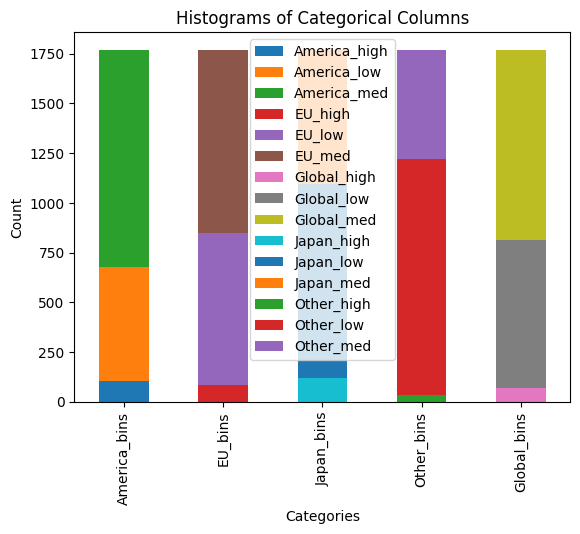

In [242]:
import matplotlib.pyplot as plt
saveddf = ndf1
# Select the categorical columns
categorical_columns = ['America_bins', 'EU_bins', 'Japan_bins', 'Other_bins', 'Global_bins']

# Plot histograms for each categorical column
saveddf[categorical_columns].apply(lambda x: x.value_counts()).T.plot(kind='bar', stacked=True)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Histograms of Categorical Columns')
plt.show()


In [226]:
# Assuming df is your DataFrame
ndf1.to_csv('ndf1.csv', index=False)


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'Global_bins' is your target variable
X = pd.get_dummies(ndf1[['America_bins', 'EU_bins', 'Japan_bins', 'Other_bins']])
y = ndf1['Global_bins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8834586466165414
Classification Report:
              precision    recall  f1-score   support

 Global_high       1.00      0.80      0.89        10
  Global_low       0.92      0.81      0.86       112
  Global_med       0.86      0.94      0.90       144

    accuracy                           0.88       266
   macro avg       0.92      0.85      0.88       266
weighted avg       0.89      0.88      0.88       266



In [73]:
X = dfno[['America', 'EU', 'Japan', 'Other']]
X

,America,EU,Japan,Other
6,4.056142,3.965202,3.812913,3.462398
7,4.147058,3.963788,3.466868,3.454845
8,4.164055,3.848805,3.672098,3.354108
10,3.957607,4.041393,3.285557,3.439333
11,3.991669,3.879096,3.615950,3.283301
...,...,...,...,...
11896,1.000000,1.301030,1.602060,1.000000
12012,1.000000,1.301030,1.301030,1.000000
12488,1.000000,1.301030,1.477121,1.000000
13000,1.477121,1.000000,1.000000,1.000000


In [74]:
y

6        4.477266
7        4.462697
8        4.456670
10       4.393751
11       4.369587
           ...   
11896    1.845098
12012    1.845098
12488    1.778151
13000    1.698970
13281    1.698970
Name: Global, Length: 2368, dtype: float64

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'Global_bins' is your target variable
X = dfno[['America', 'EU', 'Japan', 'Other']]
y = dfno['Global']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

tree_model = DecisionTreeRegressor(max_depth=20)  # Adjust max_depth based on your data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, tree_predictions)
r2 = r2_score(y_test, tree_predictions)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')



Mean Squared Error: 0.0033
R-squared: 0.9853


In [97]:
X_test.shape

(711, 4)

In [98]:
y_test.shape

(711,)

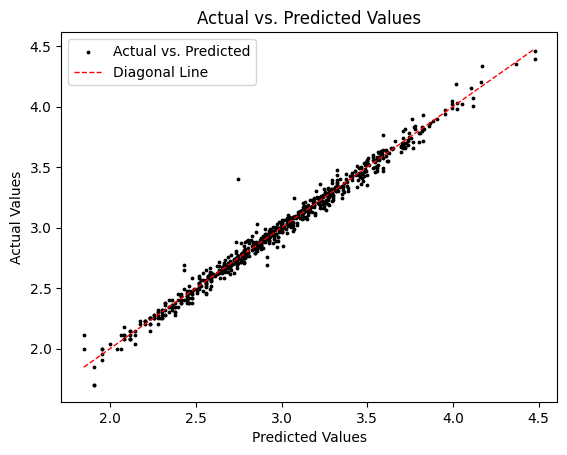

In [103]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values with smaller dots
plt.scatter(tree_predictions, y_test, color='black', label='Actual vs. Predicted', s=3)

# Plot the diagonal line
plt.plot([min(tree_predictions), max(tree_predictions)], [min(tree_predictions), max(tree_predictions)], color='red', linestyle='--', linewidth=1, label='Diagonal Line')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()


In [261]:
ndf1

,America,EU,Japan,Other,Global,America_bins,EU_bins,Japan_bins,Other_bins,Global_bins
0,7.617943,7.462697,6.576341,6.927370,7.917716,America_high,EU_high,Japan_high,Other_high,Global_high
1,7.463594,6.553883,6.833147,5.886491,7.604658,America_high,EU_high,Japan_high,Other_med,Global_high
2,7.200029,7.109916,6.578639,6.519828,7.554126,America_high,EU_high,Japan_high,Other_high,Global_high
3,7.197281,7.041787,6.515874,6.471292,7.518514,America_high,EU_high,Japan_high,Other_high,Global_high
4,7.051924,6.948902,7.009451,6.000000,7.496515,America_high,EU_high,Japan_high,Other_med,Global_high
...,...,...,...,...,...,...,...,...,...,...
9473,4.778151,4.301030,4.602060,4.301030,5.113943,America_low,EU_low,Japan_low,Other_low,Global_low
9492,4.602060,4.477121,4.602060,4.301030,5.113943,America_low,EU_low,Japan_low,Other_low,Global_low
9784,4.477121,4.698970,4.301030,4.301030,5.079181,America_low,EU_low,Japan_low,Other_low,Global_low
9867,4.477121,4.698970,4.301030,4.301030,5.079181,America_low,EU_low,Japan_low,Other_low,Global_low


In [69]:
from sklearn.svm import SVC

# Create a Support Vector Machine Classifier
model_svm = SVC()

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions on the test set
predictions_svm = model_svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, predictions_svm)
report_svm = classification_report(y_test, predictions_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Classification Report:\n{report_svm}")


NameError: name 'X_train' is not defined

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'ndf' is your DataFrame
X_reg = dfno[['America', 'EU', 'Japan', "Other"]]
y_reg = dfno['Global']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.50, random_state=42)

# Create a Linear Regression model
model_reg = LinearRegression()

# Train the model
model_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
predictions_reg = model_reg.predict(X_test_reg)

# Evaluate the regression model
mse_reg = mean_squared_error(y_test_reg, predictions_reg)

print(f"Mean Squared Error (MSE) for Regression: {mse_reg}")

from sklearn.metrics import r2_score


# Evaluate the regression model
mse_reg = mean_squared_error(y_test_reg, predictions_reg)
r2_reg = r2_score(y_test_reg, predictions_reg)

print(f"Mean Squared Error (MSE) for Regression: {mse_reg}")
print(f"R-squared (R2) for Regression: {r2_reg}")


Mean Squared Error (MSE) for Regression: 0.011722830568633257
Mean Squared Error (MSE) for Regression: 0.011722830568633257
R-squared (R2) for Regression: 0.949671609323486


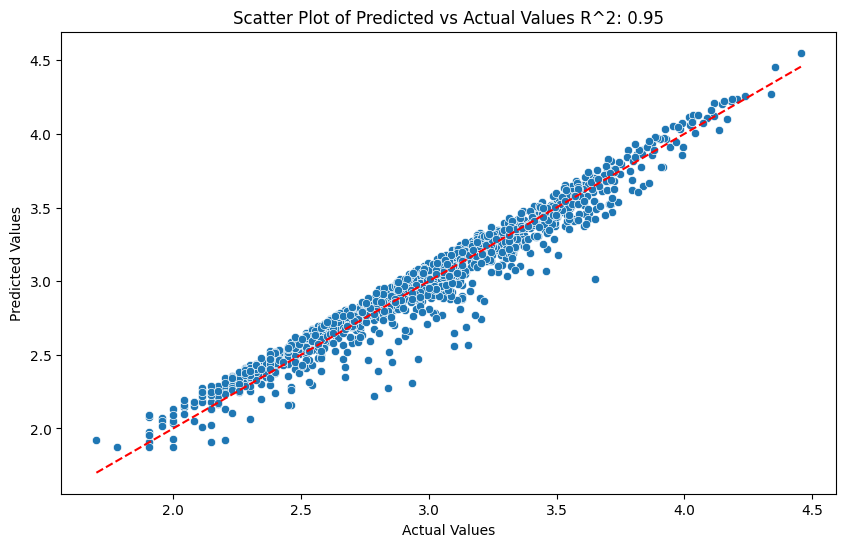

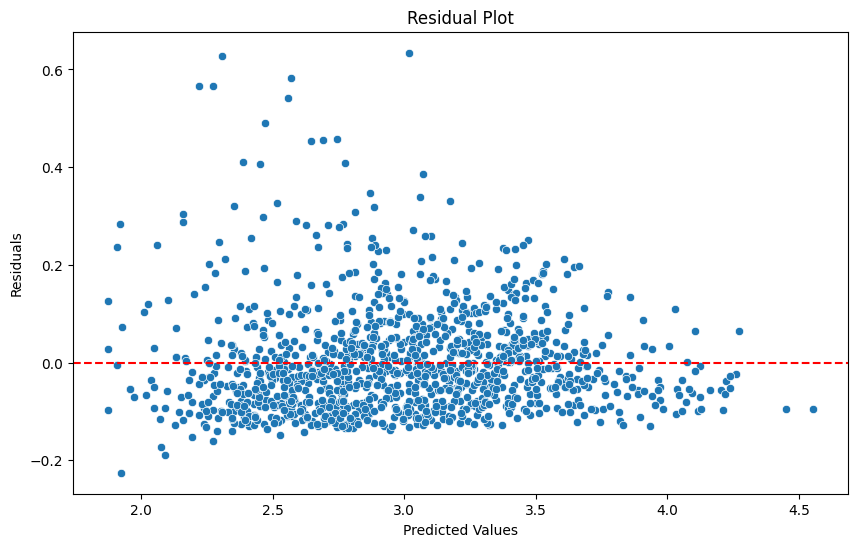

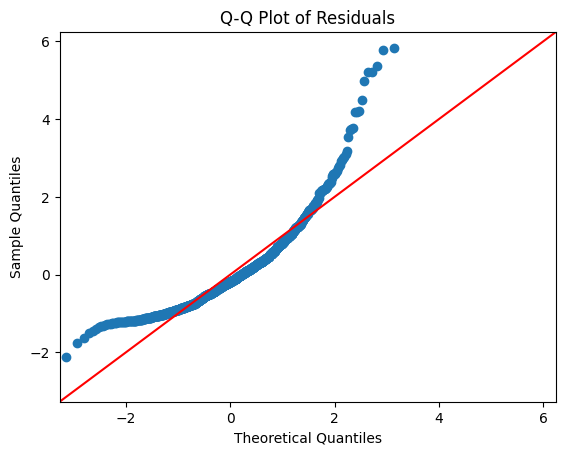

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual values
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for better handling in Seaborn
plot_data = pd.DataFrame({'Actual': y_test_reg, 'Predicted': predictions_reg})

# Scatter plot of predicted vs actual values with different colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')  # Diagonal line
plt.title('Scatter Plot of Predicted vs Actual Values R^2: {}'.format(round(r2_reg,3)))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test_reg - predictions_reg
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_reg, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

# Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, fit=True, line="45")
plt.title('Q-Q Plot of Residuals')
plt.show()


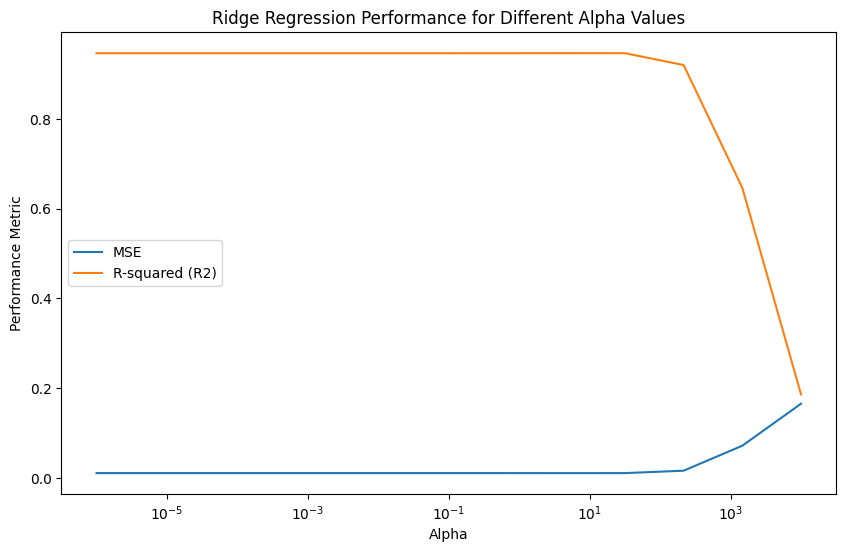

In [284]:
import numpy as np

# Specify a range of alpha values
alphas = np.logspace(-6, 4, 13)

# Lists to store results
mse_values = []
r2_values = []

# Iterate over alpha values
for alpha in alphas:
    # Create a Ridge Regression model
    ridge_model = Ridge(alpha=alpha)

    # Train the Ridge model
    ridge_model.fit(X_train_reg, y_train_reg)

    # Make predictions on the test set
    predictions_ridge = ridge_model.predict(X_test_reg)

    # Evaluate the Ridge regression model
    mse_ridge = mean_squared_error(y_test_reg, predictions_ridge)
    r2_ridge = r2_score(y_test_reg, predictions_ridge)

    # Append results to lists
    mse_values.append(mse_ridge)
    r2_values.append(r2_ridge)

    #print(f"Alpha: {alpha}, MSE: {mse_ridge}, R2: {r2_ridge}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, label='MSE')
plt.plot(alphas, r2_values, label='R-squared (R2)')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Performance Metric')
plt.title('Ridge Regression Performance for Different Alpha Values')
plt.legend()
plt.show()


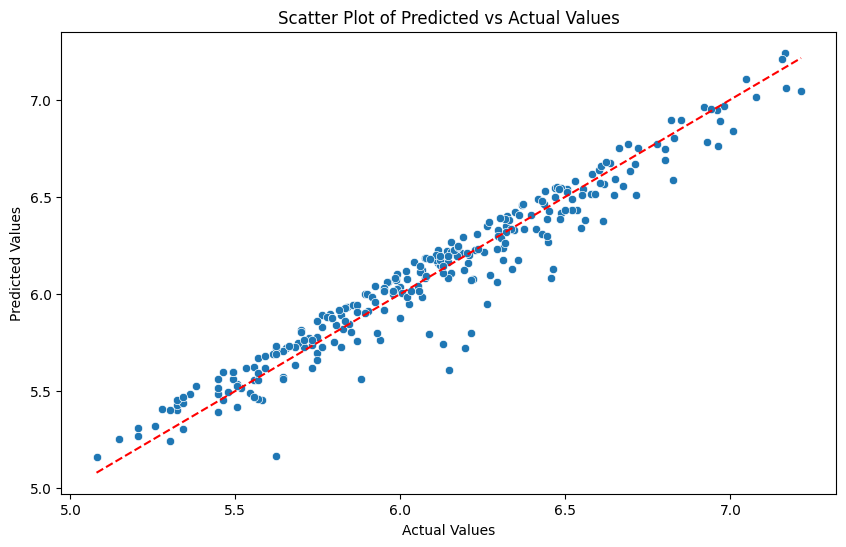

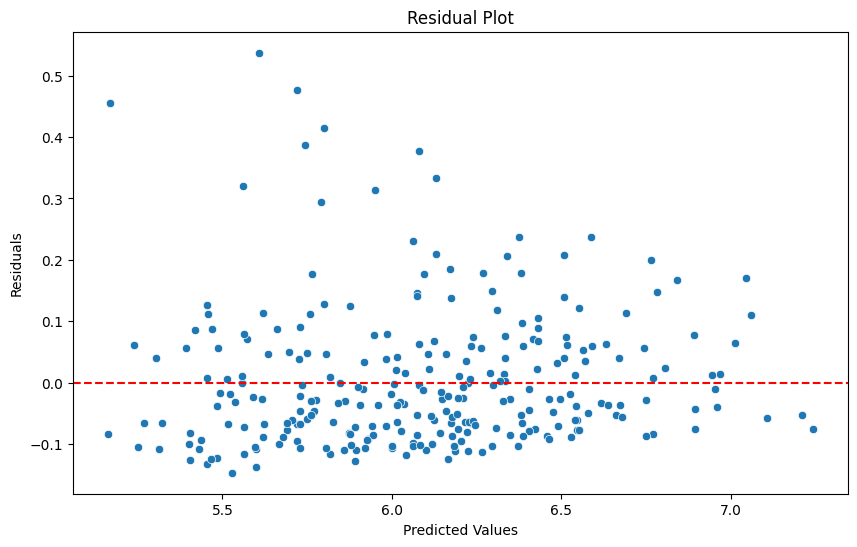

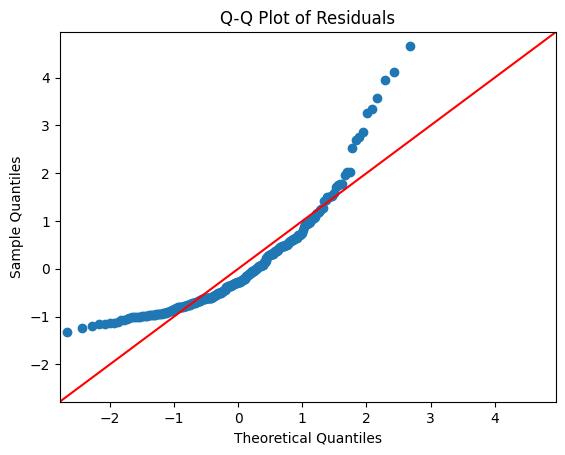

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual values
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for better handling in Seaborn
plot_data = pd.DataFrame({'Actual': y_test_reg, 'Predicted': predictions_reg})

# Scatter plot of predicted vs actual values with different colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')  # Diagonal line
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test_reg - predictions_reg
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_reg, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

# Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, fit=True, line="45")
plt.title('Q-Q Plot of Residuals')
plt.show()


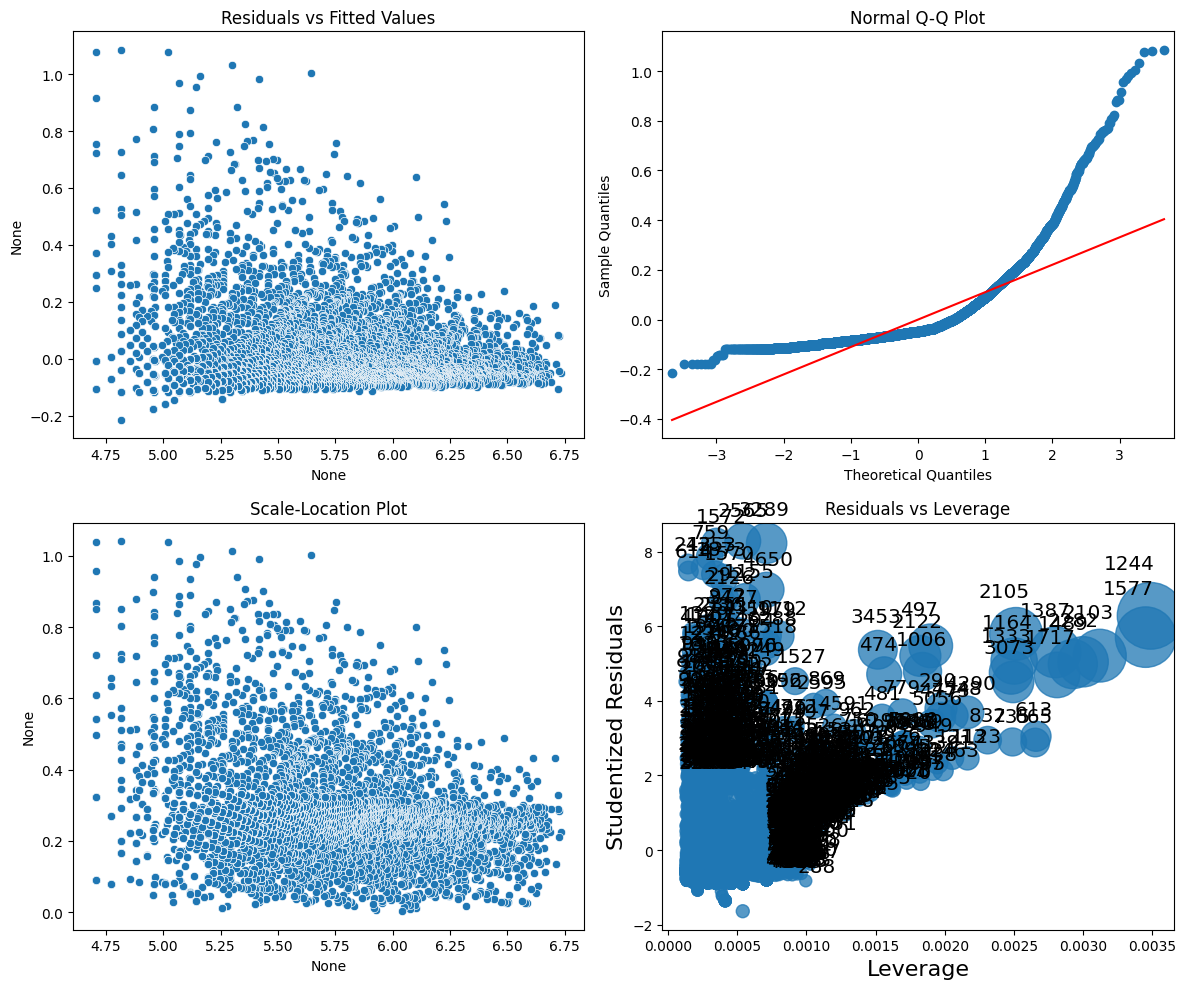

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame named 'df' with columns 'y', 'x1', 'x2', 'x3'
# Replace them with your actual column names

# Fit a linear regression model
X = sm.add_constant(df[['America', 'EU']])
y = df['Global']
model = sm.OLS(y, X).fit()

# Residual Analysis
residuals = model.resid

# Diagnostic Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted Values Plot
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=axes[0, 0])
axes[0, 0].set_title('Residuals vs Fitted Values')

# Normal Q-Q Plot
sm.qqplot(residuals, line='r', ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot')

# Scale-Location Plot (Square Root of Residuals vs Fitted Values)
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(residuals)), ax=axes[1, 0])
axes[1, 0].set_title('Scale-Location Plot')

# Residuals vs Leverage Plot
sm.graphics.influence_plot(model, ax=axes[1, 1], criterion='cooks')
axes[1, 1].set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()




In [114]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Global   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 4.252e+04
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:31:05   Log-Likelihood:                 4835.4
No. Observations:                7947   AIC:                            -9665.
Df Residuals:                    7944   BIC:                            -9644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4311      0.018     24.265      0.0

In [ ]:
print(model.summary())

In [60]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()

le = LabelEncoder()
feature = ["Platform", "Genre"]


for col in feature:
    data[col] = le.fit_transform(df[col])

In [61]:
X = data[[ 'NA_Sales', 'EU_Sales']].values

y = data['Global_Sales'].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 2), (13278,), (3320, 2), (3320,))

In [65]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

r2_MultiLinear = r2_score(y_test,pred)
r2_MultiLinear


0.9761812756906768

0.9778895761854467

In [29]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
pred = lr.predict(X_test)

# Calculate the R-squared
r2 = r2_score(y_test, pred)

# Calculate the adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


R-squared: 0.9999928446643035
Adjusted R-squared: 0.9999928360304142


In [57]:
df

,rank,name,plat,year,genre,publisher,America,EU,Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,31.37
...,...,...,...,...,...,...,...,...,...
16135,16138,Vanark,PS,1999.0,Shooter,Jaleco,0.01,0.01,0.01
16154,16157,Bratz: Forever Diamondz,PS2,2006.0,Adventure,THQ,0.01,0.01,0.01
16193,16196,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,0.01,0.01,0.01
16222,16225,Carmageddon: Max Damage,XOne,2016.0,Action,Stainless Games,0.01,0.01,0.01


In [58]:
import numpy as np

last_3_columns = df.columns[-3:]
df[last_5_columns] *= 1000000
df[last_5_columns] = np.log10(df[last_3_columns].values)


In [59]:
df

,rank,name,plat,year,genre,publisher,America,EU,Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,7.617943,7.462697,7.917716
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,7.463594,6.553883,7.604658
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,7.200029,7.109916,7.554126
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,7.197281,7.041787,7.518514
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,7.051924,6.948902,7.496515
...,...,...,...,...,...,...,...,...,...
16135,16138,Vanark,PS,1999.0,Shooter,Jaleco,4.000000,4.000000,4.000000
16154,16157,Bratz: Forever Diamondz,PS2,2006.0,Adventure,THQ,4.000000,4.000000,4.000000
16193,16196,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,4.000000,4.000000,4.000000
16222,16225,Carmageddon: Max Damage,XOne,2016.0,Action,Stainless Games,4.000000,4.000000,4.000000


In [60]:
df1 = df


In [134]:
df[['America', 'EU', 'Japan', 'Other', 'Global']] = df[['America', 'EU', 'Japan', 'Other', 'Global']].apply(pd.to_numeric, errors='coerce')

log_columns = ['America', 'EU', 'Japan', 'Other', 'Global']
df[log_columns] = np.log10(df[log_columns])

df

,rank,name,plat,year,genre,publisher,America,EU,Japan,Other,Global
0,1,Wii Sports,Wii,27.0,Sports,Nintendo,7.617943,7.462697,6.576341,6.927370,7.917716
1,2,Super Mario Bros.,NES,6.0,Platform,Nintendo,7.463594,6.553883,6.833147,5.886491,7.604658
2,3,Mario Kart Wii,Wii,29.0,Racing,Nintendo,7.200029,7.109916,6.578639,6.519828,7.554126
3,4,Wii Sports Resort,Wii,30.0,Sports,Nintendo,7.197281,7.041787,6.515874,6.471292,7.518514
4,5,Pokemon Red/Pokemon Blue,GB,17.0,Role-Playing,Nintendo,7.051924,6.948902,7.009451,6.000000,7.496515
...,...,...,...,...,...,...,...,...,...,...,...
11896,11898,Grand Kingdom,PSV,36.0,Role-Playing,Nippon Ichi Software,4.000043,4.301052,4.602071,4.000043,4.845104
12012,12014,Guilty Gear Xrd -Revelator-,PS3,37.0,Fighting,PQube,4.000043,4.301052,4.301052,4.000043,4.845104
12488,12490,Odin Sphere: Leifthrasir,PS3,37.0,Role-Playing,Nippon Ichi Software,4.000043,4.301052,4.477136,4.000043,4.778158
13000,13002,Natural Doctrine,PS3,35.0,Role-Playing,Nippon Ichi Software,4.477136,4.000043,4.000043,4.000043,4.698979


In [86]:
df

,rank,name,plat,year,genre,publisher,America,EU,Japan,Other,Global
0,1,Wii Sports,Wii,27.0,Sports,Nintendo,7.617943,7.462697,6.576341,6.927370,7.917716
1,2,Super Mario Bros.,NES,6.0,Platform,Nintendo,7.463594,6.553883,6.833147,5.886491,7.604658
2,3,Mario Kart Wii,Wii,29.0,Racing,Nintendo,7.200029,7.109916,6.578639,6.519828,7.554126
3,4,Wii Sports Resort,Wii,30.0,Sports,Nintendo,7.197281,7.041787,6.515874,6.471292,7.518514
4,5,Pokemon Red/Pokemon Blue,GB,17.0,Role-Playing,Nintendo,7.051924,6.948902,7.009451,6.000000,7.496515
...,...,...,...,...,...,...,...,...,...,...,...
11896,11898,Grand Kingdom,PSV,36.0,Role-Playing,Nippon Ichi Software,4.000000,4.301030,4.602060,4.000000,4.845098
12012,12014,Guilty Gear Xrd -Revelator-,PS3,37.0,Fighting,PQube,4.000000,4.301030,4.301030,4.000000,4.845098
12488,12490,Odin Sphere: Leifthrasir,PS3,37.0,Role-Playing,Nippon Ichi Software,4.000000,4.301030,4.477121,4.000000,4.778151
13000,13002,Natural Doctrine,PS3,35.0,Role-Playing,Nippon Ichi Software,4.477121,4.000000,4.000000,4.000000,4.698970


<Axes: >

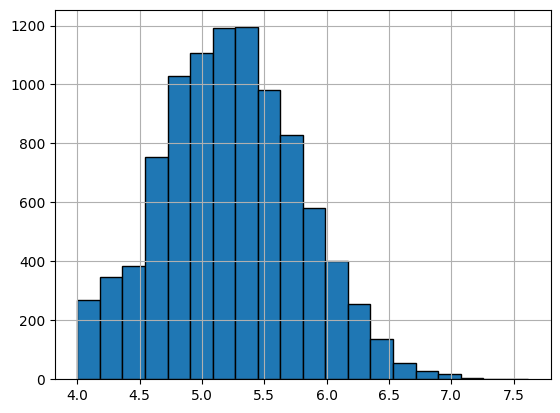

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame

# Plot histogram
df['America'].hist(bins=20, edgecolor='black')  # Adjust the number of bins as needed


In [7]:
df['info'] = df['name'] + ' ' + df['plat'] + ' ' + df['genre'] + ' ' + df['publisher']


In [51]:

df

,rank,name,plat,year,genre,publisher,America,EU,Global
0,1,Wii Sports,Wii,27.0,Sports,Nintendo,7.617943,7.462697,7.917716
1,2,Super Mario Bros.,NES,6.0,Platform,Nintendo,7.463594,6.553883,7.604658
2,3,Mario Kart Wii,Wii,29.0,Racing,Nintendo,7.200029,7.109916,7.554126
3,4,Wii Sports Resort,Wii,30.0,Sports,Nintendo,7.197281,7.041787,7.518514
4,5,Pokemon Red/Pokemon Blue,GB,17.0,Role-Playing,Nintendo,7.051924,6.948902,7.496515
...,...,...,...,...,...,...,...,...,...
16135,16138,Vanark,PS,20.0,Shooter,Jaleco,4.000000,4.000000,4.000000
16154,16157,Bratz: Forever Diamondz,PS2,27.0,Adventure,THQ,4.000000,4.000000,4.000000
16193,16196,K-1 Grand Prix,PS,20.0,Fighting,Jaleco,4.000000,4.000000,4.000000
16222,16225,Carmageddon: Max Damage,XOne,37.0,Action,Stainless Games,4.000000,4.000000,4.000000


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

X = df[['America', 'EU']]
y = df['Global']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define a range of alpha values to test
alpha_values = [.001, .01,.05, 0.1, 0.5, 1.0, 5.0, 10.0,50,100]

# Iterate through different alpha values
for alpha in alpha_values:
    # Initialize the Ridge Regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)

    # Train the model on the training set
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Alpha: {alpha}, Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}')

Alpha: 0.001, Mean Squared Error: 0.0205, R-squared: 0.9361
Alpha: 0.01, Mean Squared Error: 0.0205, R-squared: 0.9361
Alpha: 0.05, Mean Squared Error: 0.0205, R-squared: 0.9361
Alpha: 0.1, Mean Squared Error: 0.0205, R-squared: 0.9361
Alpha: 0.5, Mean Squared Error: 0.0205, R-squared: 0.9361
Alpha: 1.0, Mean Squared Error: 0.0205, R-squared: 0.9361
Alpha: 5.0, Mean Squared Error: 0.0205, R-squared: 0.9360
Alpha: 10.0, Mean Squared Error: 0.0205, R-squared: 0.9360
Alpha: 50, Mean Squared Error: 0.0207, R-squared: 0.9354
Alpha: 100, Mean Squared Error: 0.0210, R-squared: 0.9344


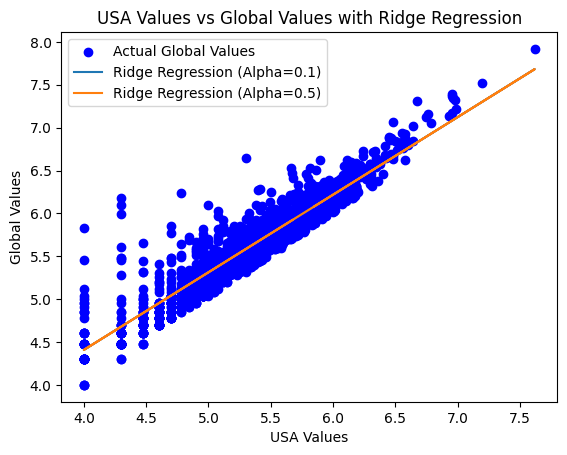

In [55]:
X = df[['America']]
y = df['Global']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define a range of alpha values to test
alpha_values = [0.1, 0.5]

# Plot the USA values and the Global values
plt.scatter(X_test, y_test, color='blue', label='Actual Global Values')

# Iterate through different alpha values
for alpha in alpha_values:
    # Initialize the Ridge Regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)

    # Train the model on the training set
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Plot the regression line
    plt.plot(X_test, y_pred, label=f'Ridge Regression (Alpha={alpha})')

plt.xlabel('USA Values')
plt.ylabel('Global Values')
plt.title('USA Values vs Global Values with Ridge Regression')
plt.legend()
plt.show()

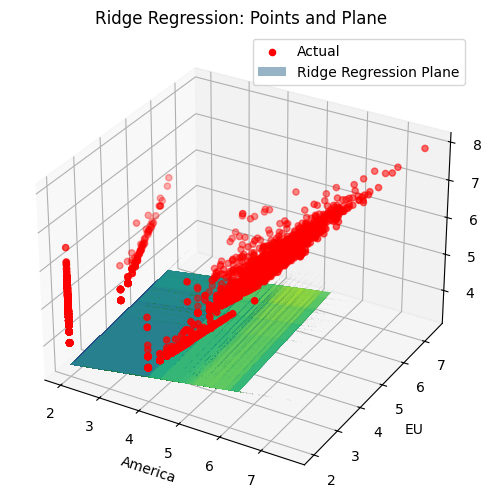

In [77]:

# Plot the points and the regression plane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_test['America'], X_test['EU'], y_test, c='r', marker='o', label='Actual')

# Create a meshgrid for the plane
xx, yy = np.meshgrid(X_test['America'], X_test['EU'])
zz = ridge_model.coef_[0] * xx + ridge_model.coef_[1] * yy + ridge_model.intercept_

# Plot the regression plane
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label='Ridge Regression Plane')

ax.set_xlabel('America')
ax.set_ylabel('EU')
ax.set_zlabel('Global')

plt.title('Ridge Regression: Points and Plane')
plt.legend()
plt.show()

In [118]:
df['highlow'] = np.where(df['Global1'] > 5.2, 'high', 'low')


In [11]:
bins = pd.cut(df['Global1'], bins=3, labels=False, precision=1, include_lowest=True)
df['bins'] = bins

df['bins'] = df['bins'].astype(str)


In [12]:
df

,rank,name,plat,year,genre,publisher,America,EU,Japan,Other,Global,Global1,info,bins
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0,7.917716,Wii Sports Wii Sports Nintendo,2
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0,7.604658,Super Mario Bros. NES Platform Nintendo,2
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35820000.0,7.554126,Mario Kart Wii Wii Racing Nintendo,2
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0,7.518514,Wii Sports Resort Wii Sports Nintendo,2
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31370000.0,7.496515,Pokemon Red/Pokemon Blue GB Role-Playing Nintendo,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,10000.0,0.0,0.0,0.0,10000.0,4.000000,Woody Woodpecker in Crazy Castle 5 GBA Platfor...,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,10000.0,0.0,0.0,0.0,10000.0,4.000000,Men in Black II: Alien Escape GC Shooter Infog...,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0,10000.0,4.000000,SCORE International Baja 1000: The Official Ga...,0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.0,10000.0,0.0,0.0,10000.0,4.000000,Know How 2 DS Puzzle 7G//AMES,0


In [136]:
df['Globalbin'] = df['Globalbin'].astype(str)


In [165]:
df['bins'] = df['bins'].astype(str)


In [166]:
df['info1'] = df['info'] + ' ' + df['bins'] 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

X = df['plat']
y = df['bins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer( )
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of the resulting sets
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)


from sklearn.linear_model import LogisticRegression

# Define a list of regularization parameter values (C)
C_values = [0.001,.005, 0.01, .05,0.1,.25, .5, .75, 1 ]

# Iterate through different values of C
for C in C_values:
    # Create Logistic Regression model with L2 regularization
    logistic_reg_model = LogisticRegression(C=C, penalty='l2', random_state=42, max_iter =3000)

    # Train the model on the training set
    logistic_reg_model.fit(X_train_tfidf, y_train)

    # Predictions on the test set
    y_pred = logistic_reg_model.predict(X_test_tfidf)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Regularization Parameter (C): {C}, Accuracy: {accuracy:.4f}")


X_train_tfidf shape: (13032, 8371)
X_test_tfidf shape: (3259, 8371)
Regularization Parameter (C): 0.001, Accuracy: 0.5539
Regularization Parameter (C): 0.005, Accuracy: 0.6002
Regularization Parameter (C): 0.01, Accuracy: 0.6422
Regularization Parameter (C): 0.05, Accuracy: 0.7039
Regularization Parameter (C): 0.1, Accuracy: 0.7156
Regularization Parameter (C): 0.25, Accuracy: 0.7306
Regularization Parameter (C): 0.5, Accuracy: 0.7413
Regularization Parameter (C): 0.75, Accuracy: 0.7419
Regularization Parameter (C): 1, Accuracy: 0.7465
